In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten

Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
100% 4.74G/4.77G [00:55<00:00, 117MB/s] 
100% 4.77G/4.77G [00:58<00:00, 86.8MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fruit-and-vegetable-disease-healthy-vs-rotten.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 fruit-and-vegetable-disease-healthy-vs-rotten.zip   kaggle.json
'Fruit And Vegetable Diseases Dataset'		     sample_data


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import os
import shutil

# Set the path to the dataset
dataset_dir = '/content/Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]  # Limiting to 200 images per class as in the image

    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")

Bellpepper__Healthy 200
Guava__Rotten 200
Banana__Rotten 200
Orange__Rotten 200
Grape__Healthy 200
Jujube__Healthy 200
Pomegranate__Healthy 200
Potato__Rotten 200
Carrot__Rotten 200
Apple__Healthy 200
Mango__Healthy 200
Tomato__Rotten 200
Orange__Healthy 200
Strawberry__Rotten 200
Apple__Rotten 200
Grape__Rotten 200
Jujube__Rotten 200
Guava__Healthy 200
Cucumber__Healthy 200
Carrot__Healthy 200
Potato__Healthy 200
Pomegranate__Rotten 200
Tomato__Healthy 200
Strawberry__Healthy 200
Bellpepper__Rotten 200
Mango__Rotten 200
Cucumber__Rotten 200
Banana__Healthy 200
Dataset split into training, validation, and test sets.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary' # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 3358 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1119 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

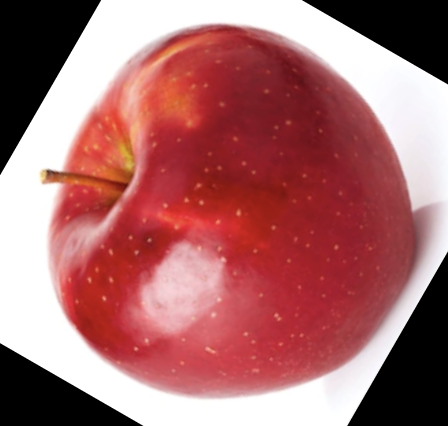

In [8]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Apple__Healthy' # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

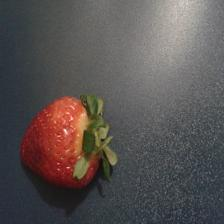

In [9]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Strawberry__Healthy' # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

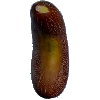

In [10]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Cucumber__Rotten' # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

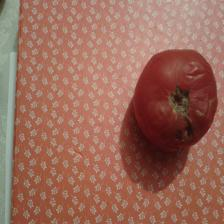

In [11]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Tomato__Rotten' # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [12]:
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=20)

Found 3358 images belonging to 28 classes.
Found 1119 images belonging to 28 classes.


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Load the VGG16 model without the top (fully connected) layers
# and specify the input shape
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# Print each layer in the VGG16 model
print("Layers in VGG16:")
for layer in vgg.layers:
    print(layer)

# Get the number of layers in the VGG16 model
print(f"\nNumber of layers in vgg.layers: {len(vgg.layers)}")

# Set all layers in the pre-trained VGG model to be non-trainable
# This freezes the pre-trained weights
for layer in vgg.layers:
    layer.trainable = False

# Define the input for the new model
# Use the input of the pre-trained VGG model
vgg_input = vgg.input

# Flatten the output of the pre-trained VGG model
x = Flatten()(vgg.output)

# Add a new Dense output layer with 28 units and softmax activation
# This is for a classification task with 28 classes
output = Dense(28, activation='softmax')(x)

# Create a new model using the original VGG input and the new output layer
vgg16_model = Model(inputs=vgg_input, outputs=output)

# Print a summary of the new model architecture
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Layers in VGG16:
<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>

Number of layers in vgg.layers: 19


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
opt=Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
vgg16_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg16_model.fit(train, validation_data=test, epochs=10, callbacks=[early_stopping])
vgg16.save('healthy_vs_rotten.h5')

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 100s 588ms/step - accuracy: 0.9366 - loss: 0.1997 - val_accuracy: 0.7498 - val_loss: 1.3012
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 94s 557ms/step - accuracy: 0.9455 - loss: 0.1817 - val_accuracy: 0.7891 - val_loss: 1.1033
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 92s 546ms/step - accuracy: 0.9240 - loss: 0.2942 - val_accuracy: 0.8105 - val_loss: 0.9875
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 92s 545ms/step - accuracy: 0.9574 - loss: 0.1374 - val_accuracy: 0.7659 - val_loss: 1.3726
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 90s 533ms/step - accuracy: 0.9724 - loss: 0.0926 - val_accuracy: 0.8365 - val_loss: 0.9821
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 92s 548ms/step - accuracy: 0.9730 - loss: 0.0844 - val_accuracy: 0.7954 - val_loss: 1.0939
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 142s 546ms/step - accuracy: 0.9798 - loss: 0.0509 - val_accuracy: 0.8293 - val_loss: 0.9626
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 93s 552ms/step - accuracy: 0.9640 - loss:

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input # Assuming VGG16 preprocess_input

# Define the labels list as shown in the image
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

# --- Testing class - 1 ---
print("Testing class - 1")

# Define the image path for the first test
img_path_1 = '/content/output_dataset/train/Guava__Healthy/FreshGuava (105).jpg'

# Load the image, resize it to the target size (224, 224) as expected by VGG16
img_1 = image.load_img(img_path_1, target_size=(224, 224))

# Convert the image to a NumPy array
x_1 = image.img_to_array(img_1)

# Expand dimensions to create a batch of 1 image (1, 224, 224, 3)
x_1 = np.expand_dims(x_1, axis=0)

# Preprocess the input for VGG16 (e.g., performs pixel scaling, channel ordering)
x_1 = preprocess_input(x_1)

# Make a prediction using the pre-trained vgg16 model (assuming vgg16 is already loaded and compiled)
# If your model variable is `vgg16_model` from previous steps, replace `vgg16` with `vgg16_model`.
# For the sake of this code, we assume 'vgg16' is the correct variable name for your trained model.
preds_1 = vgg16.predict(x_1)

# Print the raw predictions (probabilities for each class)
print(preds_1)

# Get the index of the class with the highest probability
predicted_class_index_1 = np.argmax(preds_1)

# Print the predicted label
print(labels[predicted_class_index_1]) # Should output 4 based on the image

# --- Testing class - 2 ---
print("\nTesting class - 2")

# Define the image path for the second test
img_path_2 = '/content/output_dataset/train/Mango__Rotten/589.jpg'

# Load the image, resize it to the target size (224, 224)
img_2 = image.load_img(img_path_2, target_size=(224, 224))

# Convert the image to a NumPy array
x_2 = image.img_to_array(img_2)

# Expand dimensions to create a batch of 1 image
x_2 = np.expand_dims(x_2, axis=0)

# Preprocess the input for VGG16
x_2 = preprocess_input(x_2)

# Make a prediction
preds_2 = vgg16.predict(x_2)

# Print the raw predictions
print(preds_2)

# Get the index of the class with the highest probability
predicted_class_index_2 = np.argmax(preds_2)

# Print the predicted label
print(labels[predicted_class_index_2]) # Should output 17 based on the image

Testing class - 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[4.2761912e-15 9.6963603e-29 1.7880714e-22 6.2929821e-21 1.8882799e-34
  7.3327037e-08 7.3270062e-10 4.3638419e-23 2.6180865e-06 4.3509579e-05
  2.9604796e-10 1.6821948e-28 2.6617216e-28 1.4642344e-20 9.1225235e-28
  6.7575747e-04 1.7317797e-18 1.1734134e-33 7.4049800e-10 2.2570461e-19
  6.0898768e-15 9.6065903e-31 1.5166816e-09 2.4825473e-15 6.8978412e-22
  5.1081130e-25 6.3353020e-21 9.9927801e-01]]
27

Testing class - 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.69678269e-12 1.11666926e-10 8.23753089e-06 6.53675727e-08
  1.17728910e-10 7.81330228e-01 2.60256122e-10 5.67058119e-13
  1.01843739e-06 4.43379604e-11 7.75452645e-04 3.07543835e-15
  3.20935740e-08 7.15017712e-10 3.89827875e-07 2.14645654e-01
  2.16809678e-11 2.30362374e-09 8.14545958e-04 4.68855316e-04
  1.30018925e-05 1.37729450e-09 1.93545735e-03 1.07405583e-07
  4.76507322e-09 3.29322090e-11 6.90504203e-06 2.50074583e-09]]
5


In [19]:
# Assuming 'labels' and 'vgg16' are already defined from previous code blocks
# If not, you would need to define them first:
# labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
# (And load your vgg16 model, e.g., vgg16 = load_model('path/to/your/saved/model.h5'))

# Necessary imports if not already imported
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input # Ensure this is the correct preprocess_input for your model

print("Testing class-3")

# [75]
img_path = '/content/output_dataset/train/Orange__Healthy/Screen Shot 2018-06-12 at 11.58.50 PM.png'

# [76]
# import numpy as np # Already imported above if running sequentially
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Add batch dimension
x = preprocess_input(x)
preds = vgg16.predict(x) # Changed np.array(x) to x as it's already a numpy array
print(preds)

# [77]
print(labels[np.argmax(preds)]) # Should output 12

print("\nTesting class-4")

# [79]
img_path = '/content/output_dataset/train/Cucumber__Healthy/freshCucumber (12).jpg'

# [80]
# import numpy as np # Already imported above if running sequentially
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Add batch dimension
x = preprocess_input(x)
preds = vgg16.predict(x) # Changed np.array(x) to x as it's already a numpy array
print(preds)

# [81] (Implied, as it's the result of labels[np.argmax(preds)])
print(labels[np.argmax(preds)]) # Should output 0

Testing class-3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[7.9645695e-14 2.9414028e-13 1.3957375e-12 1.3420590e-10 1.2006843e-26
  4.3289751e-13 2.2879715e-10 1.9208845e-19 4.1668216e-07 1.8266552e-05
  4.0627790e-10 1.8176620e-15 7.8061972e-15 2.9026029e-07 2.1849618e-12
  1.1180209e-12 9.2217466e-12 3.3540941e-19 3.0089509e-06 5.3723124e-12
  4.0085778e-12 7.9230017e-12 6.2447180e-06 4.5827892e-06 5.0019393e-17
  1.9983933e-13 9.9996722e-01 1.9345454e-10]]
26

Testing class-4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.12780905e-08 1.79780344e-17 1.27400491e-13 6.23450101e-27
  8.59380190e-18 3.91573884e-10 2.61913237e-18 8.73011787e-14
  9.99999762e-01 1.14574838e-16 1.03167177e-16 6.54498319e-25
  2.58626265e-23 2.07203442e-07 3.75847525e-21 2.55084132e-09
  2.37759028e-25 5.54655739e-28 3.86380448e-18 2.71531083e-12
  2.74412577e-18 4.42077017e-20 3.60265637e-11 7.55874816e-21
  4.43916110e-14 9.61254866e-14 7.09245032e-28 7.90552102e-16]]
8


In [20]:
# Assuming 'labels' and 'vgg16' are already defined from previous code blocks
# If not, you would need to define them first:
# labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
# (And load your vgg16 model, e.g., vgg16 = load_model('path/to/your/saved/model.h5'))

# Necessary imports if not already imported
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input # Ensure this is the correct preprocess_input for your model

print("Testing class-5")

# [82]
img_path = '/content/output_dataset/train/Potato__Rotten/rottenPotato (117).jpg'

# [83]
# import numpy as np # Already imported above if running sequentially
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # Add batch dimension
x = preprocess_input(x)
preds = vgg16.predict(x) # Changed np.array(x) to x as it's already a numpy array
print(preds)

# [84] (Implied, as it's the result of labels[np.argmax(preds)])
print(labels[np.argmax(preds)]) # Should output 23

Testing class-5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[6.3809329e-01 2.1314507e-04 2.0952680e-06 5.1043098e-06 9.7032911e-17
  1.3642971e-01 3.8794337e-06 2.5937143e-06 1.8888138e-03 1.8831811e-08
  1.9932977e-11 4.9757144e-13 2.6804062e-05 8.7321218e-12 7.4927078e-12
  2.1948037e-01 1.3034136e-09 2.6407365e-14 8.3577738e-04 1.2161113e-09
  1.1958954e-08 1.0646178e-11 4.7657728e-08 3.9105448e-09 6.8250328e-10
  2.4812170e-09 3.0184223e-03 2.1662634e-08]]
0


In [ ]:
vgg16.save('healthy_vs_rotten.h5')